In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.optimize import curve_fit
import ugradio

# 7: Plotting Test Data & Real Data

## Test Data

In [14]:
test_df = pd.read_csv('bighorn_test_data')
test_f = test_df['Frequency']
test_s = test_df['Sample']


<IPython.core.display.Javascript object>


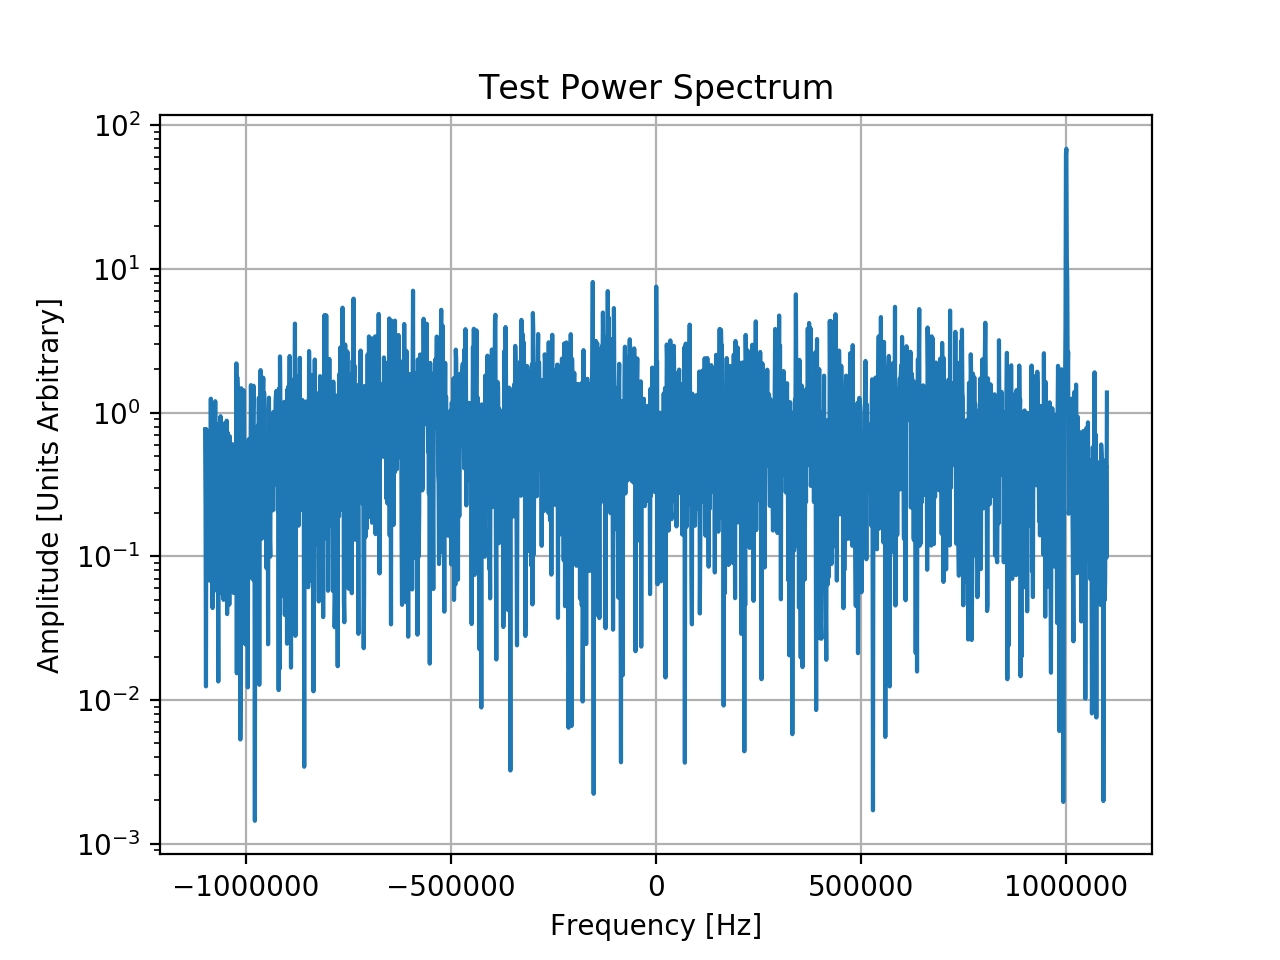

In [3]:
plt.figure()
plt.grid()
plt.title('Test Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(test_f, test_s)
plt.show()

## Real Data

In [4]:
real_df = pd.read_csv('bighorn_real_data')
real_f = real_df['Frequency']
real_s = real_df['Sample']

<IPython.core.display.Javascript object>


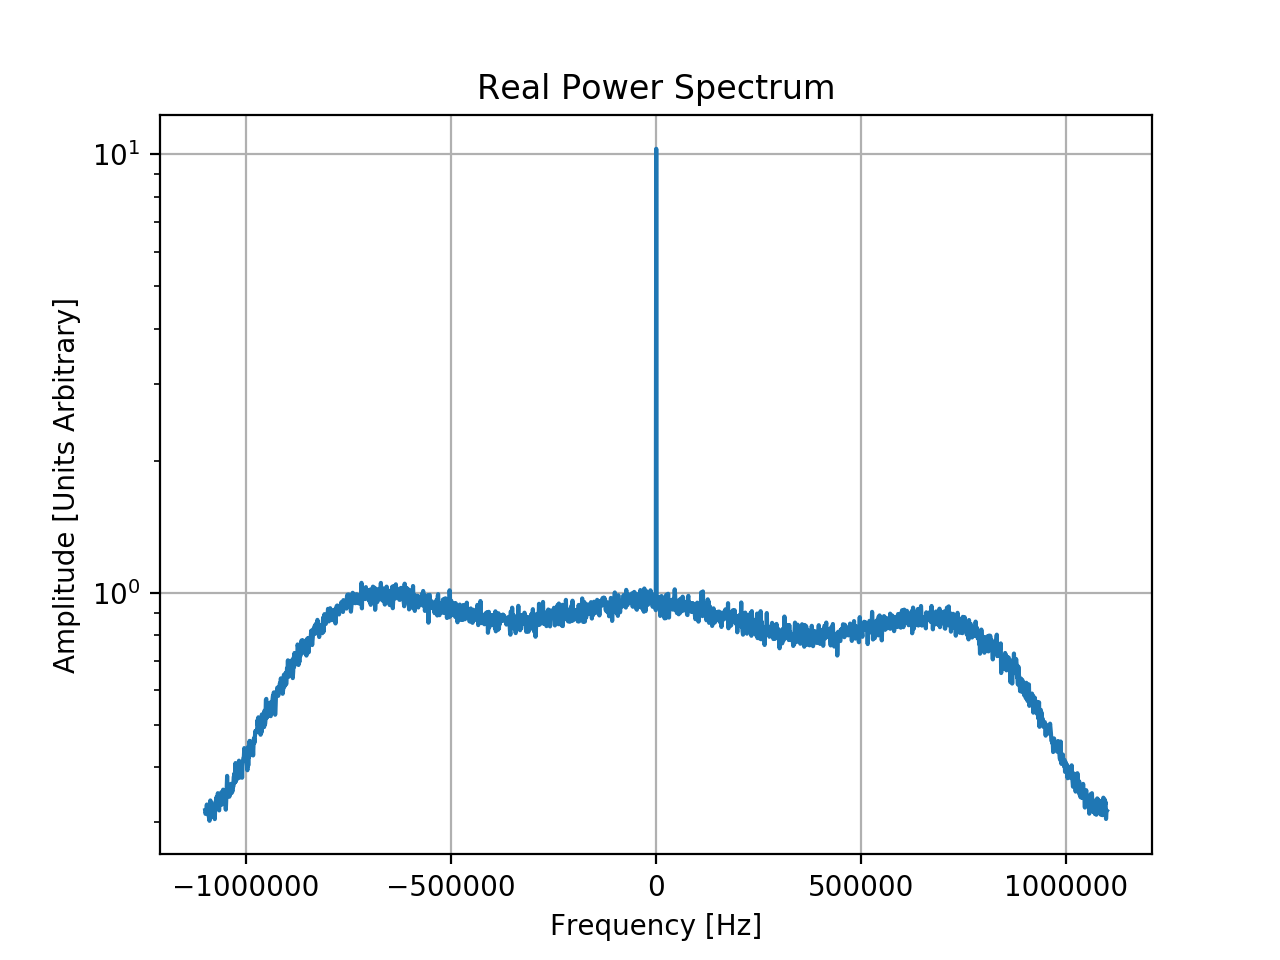

In [5]:
plt.figure()
plt.grid()
plt.title('Real Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(real_f, real_s)
plt.show()

## Real Good Data

In [6]:
rgd = pd.read_csv('real_good_data')
rgf = rgd['f']
rga = rgd['a']

In [7]:
cd = pd.read_csv('cole_data')
cf = cd['f']
ca = cd['a']

In [8]:
new_data = ca - rga

<IPython.core.display.Javascript object>


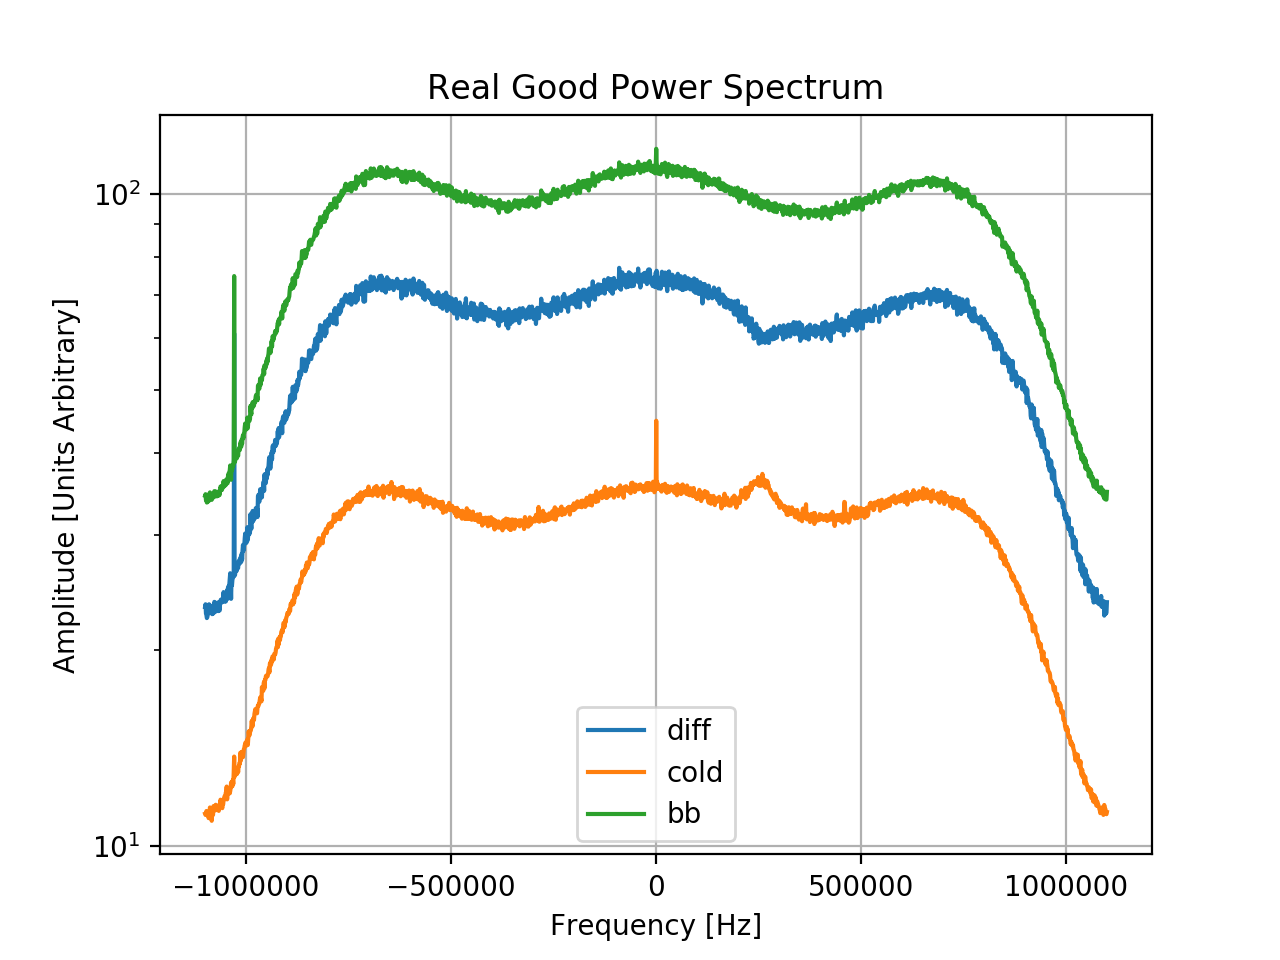

In [9]:
plt.figure()
plt.grid()
plt.title('Real Good Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(rgf, new_data, label='diff')
plt.semilogy(rgf, rga, label='cold')
plt.semilogy(cf, ca, label='bb')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


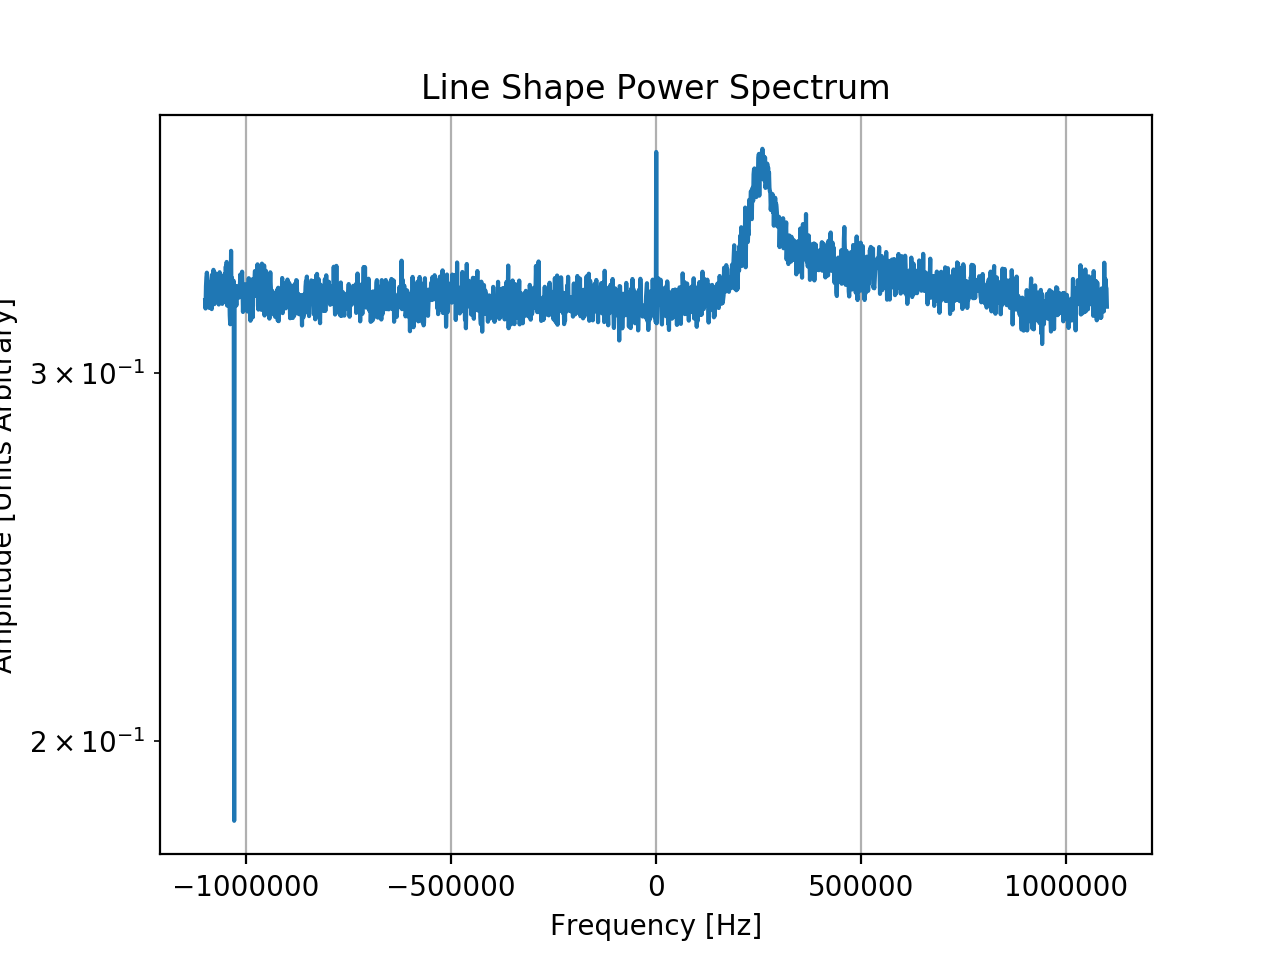

In [10]:
shape = rga/ca

plt.figure()
plt.grid()
plt.title('Line Shape Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(rgf, shape)
plt.show()

In [19]:
sum_rga = sum(rga)
G = 300/np.sum(new_data)*np.sum(rga)
G

147.56669625240806

<IPython.core.display.Javascript object>


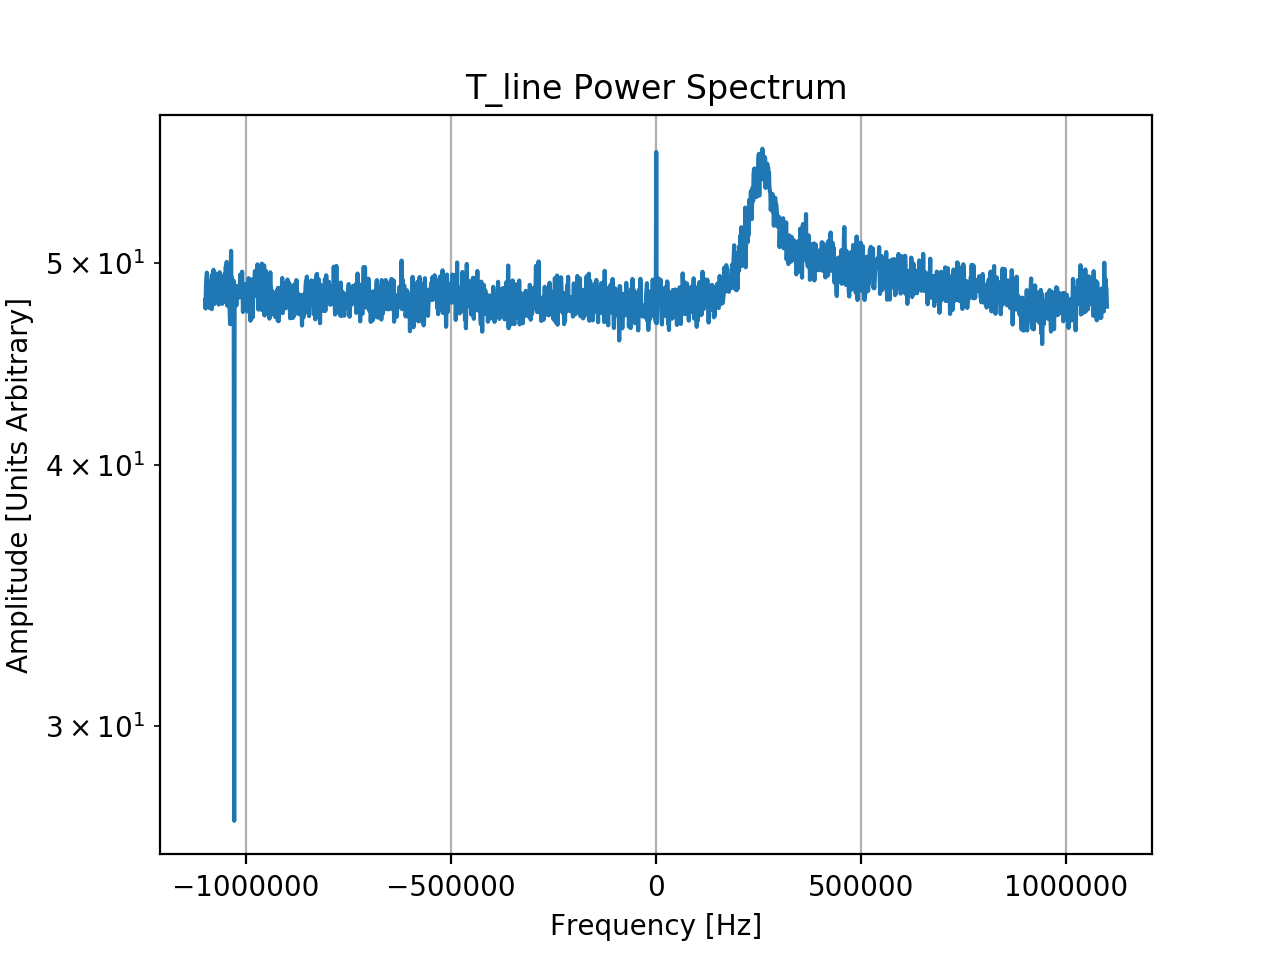

In [12]:
t_line = G*shape

plt.figure()
plt.grid()
plt.title('T_line Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(rgf, t_line)

plt.show()

In [18]:
np.where(t_line==np.max(t_line))

(array([1265]),)

<IPython.core.display.Javascript object>


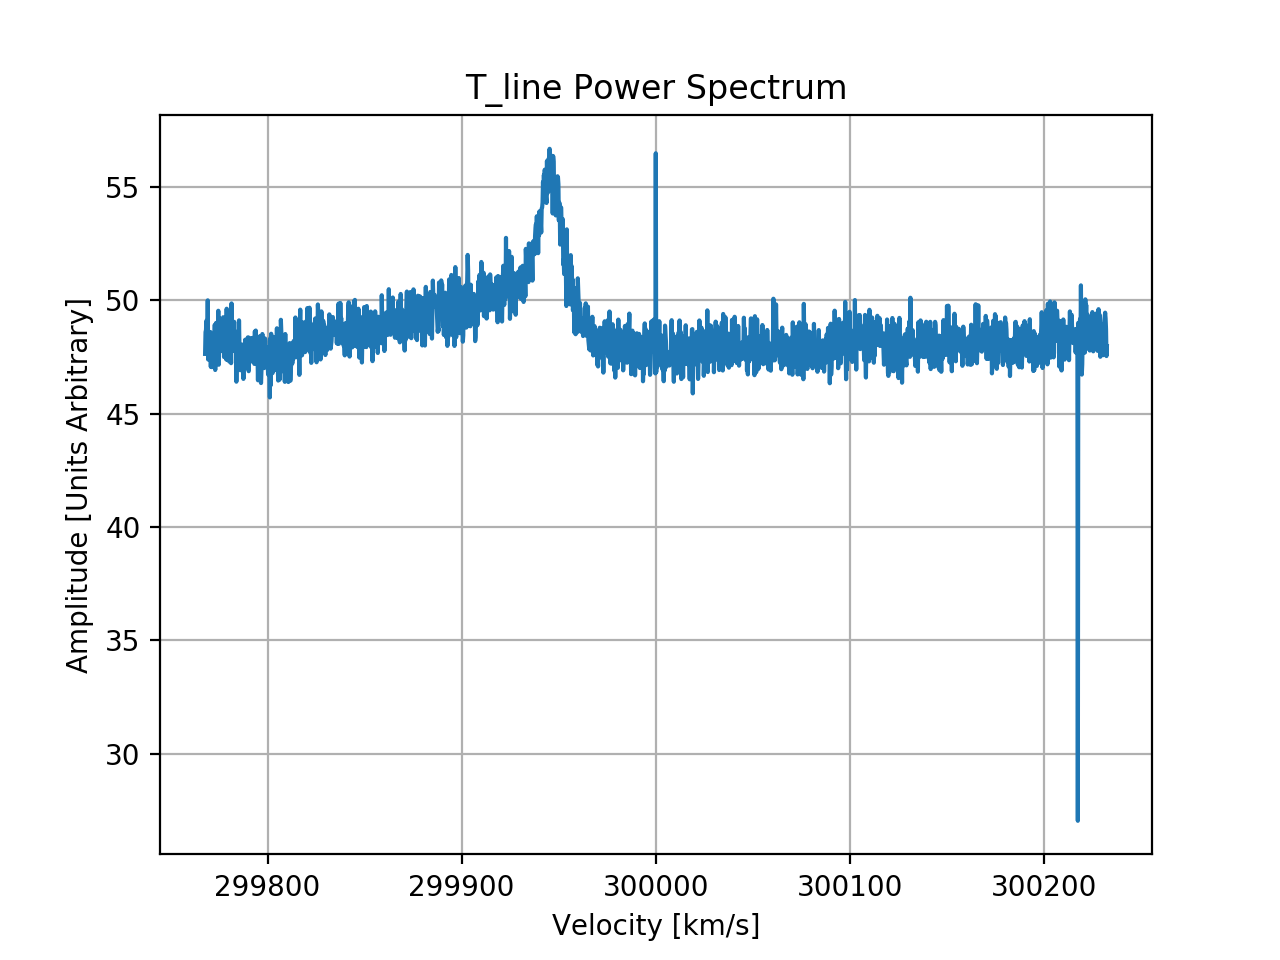

In [17]:
nu_0 = 1420e6
delta_nu = rgf - nu_0
v = -delta_nu/nu_0*(3e5)

plt.figure()
plt.grid()
plt.title('T_line Power Spectrum')
plt.xlabel('Velocity [km/s]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.plot(v, t_line)
plt.show()

4th measurement - pointed at the city - exhibits possible signs of transmitters illegally(!!) operating within the RF band (tallest band)

In [15]:
import time

In [16]:
time?

In [5]:
ugradio.doppler??

In [8]:
ugradio.doppler.get_projected_velocity(151,37.87,22053)

<Quantity -12617.96541144 m / s>

In [11]:
ugradio.doppler.get_projected_velocity??

In [ ]:
.get_projected_velocity

In [45]:
cal1_df = pd.read_csv('cal_data.csv')
cal2_df = pd.read_csv('cal_test_data.csv')
cal3_df = pd.read_csv('cal_test_data2.csv')
cal4_df = pd.read_csv('cal_test_data3.csv')
cal5_df = pd.read_csv('cal_test_data4.csv')
cal6_df = pd.read_csv('cal_test_data5.csv')
rgf_1 = cal1_df['f']
rgf_2 = cal2_df['f']
rgf_3 = cal3_df['f']
rgf_4 = cal4_df['f']
rgf_5 = cal5_df['f']
rgf_6 = cal6_df['f']
rga_1 = cal1_df['a']
rga_2 = cal2_df['a']
rga_3 = cal3_df['a']
rga_4 = cal4_df['a']
rga_5 = cal5_df['a']
rga_6 = cal6_df['a']

<IPython.core.display.Javascript object>


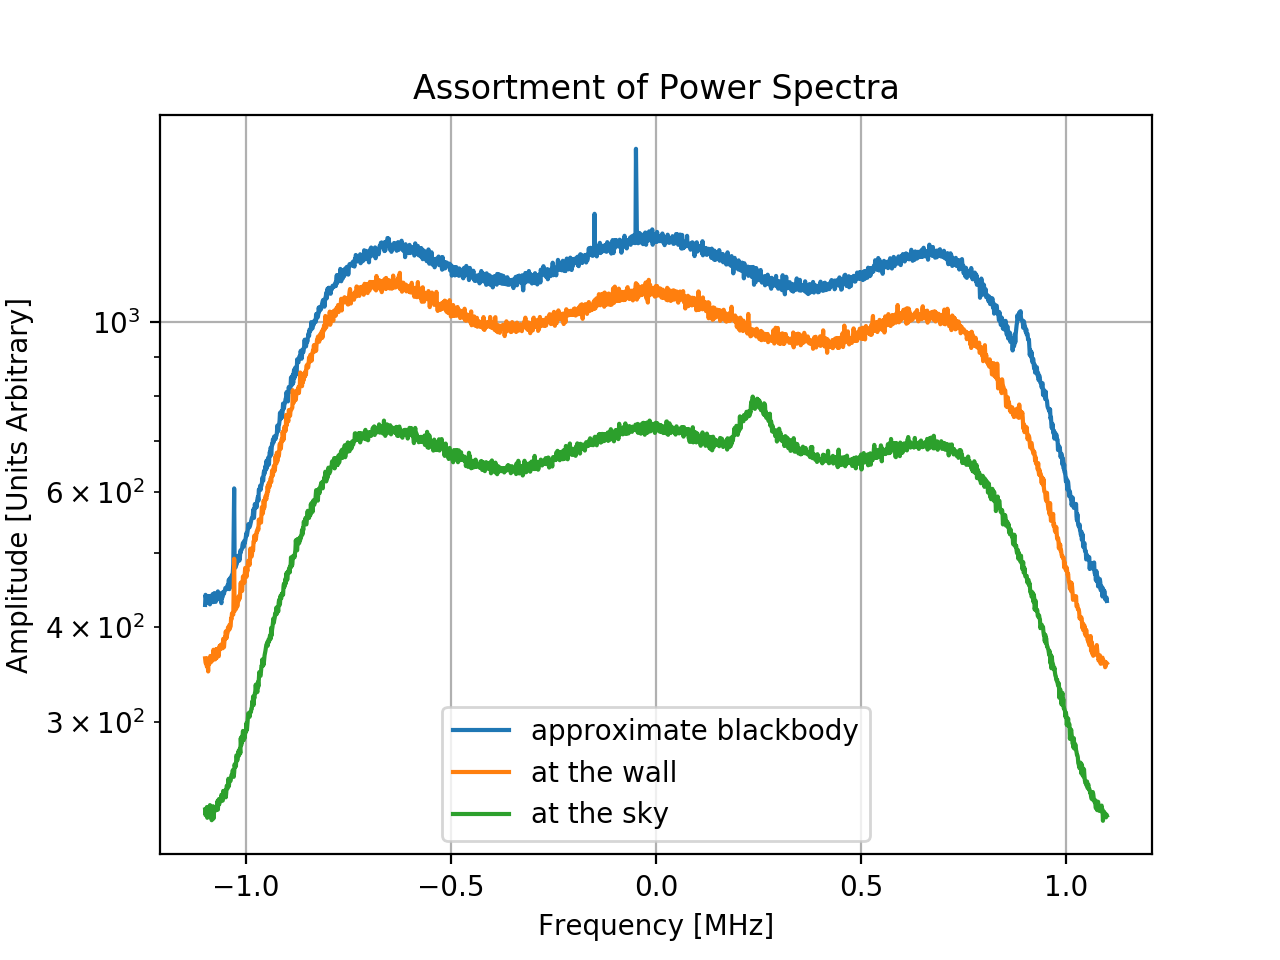

In [46]:
plt.figure()
plt.grid()
plt.title('Assortment of Power Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(rgf_1*1e-6, rga_1, label = "approximate blackbody")
plt.semilogy(rgf_2*1e-6, rga_2, label = "at the wall")
#plt.semilogy(rgd_3*1e-6, rga_3)
#plt.semilogy(rgd_4*1e-6, rga_4)
#plt.semilogy(rgd_5*1e-6, rga_5)
plt.semilogy(rgf_6*1e-6, rga_6, label = "at the sky")

plt.legend()
plt.show()

In [53]:
#renaming blackbody data
bb_f = cal1_df['f']
bb_a = cal1_df['a']
#renaming null (wall) data
null_f = cal2_df['f']
null_a = cal2_df['a']
#renaming sky data
sky_f = cal6_df['f']
sky_a = cal6_df['a']

<IPython.core.display.Javascript object>


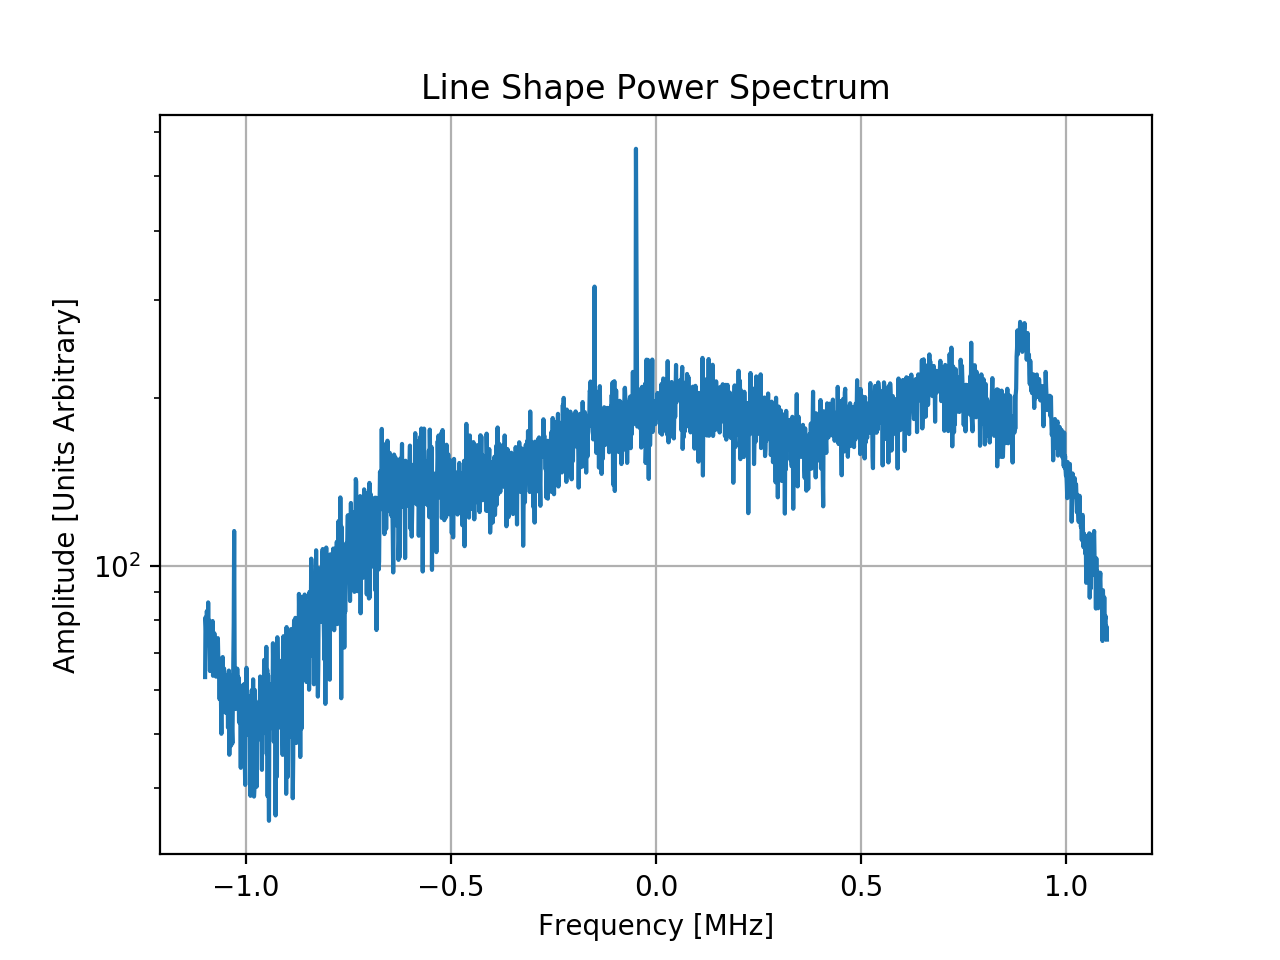

In [67]:
shape = bb_a - null_a
plt.figure()
plt.grid()
plt.title('Line Shape Power Spectrum')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(rgf_2*1e-6, shape)
plt.show()


In [68]:
calibrate = np.mean(shape)

In [69]:
PtoT = 300/calibrate
PtoT

1.9341864906183739

<IPython.core.display.Javascript object>


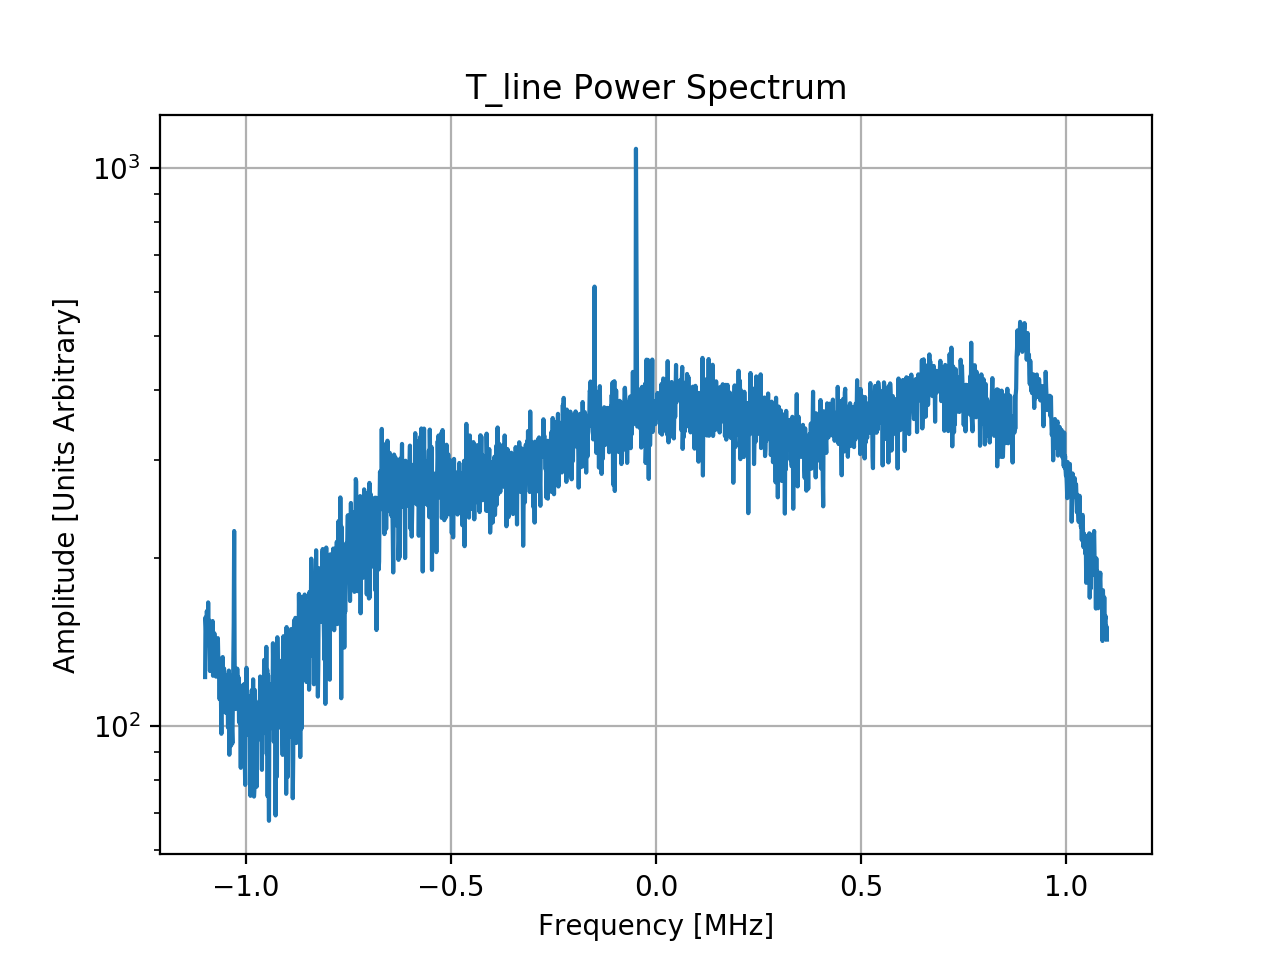

In [70]:
t_line = PtoT*shape

plt.figure()
plt.grid()
plt.title('T_line Power Spectrum')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(rgf_2*1e-6, t_line)

plt.show()